In [ ]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import keras
# Deep learning libraries
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image, ImageOps


import seaborn as sns

In [ ]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 100

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_covid = '/content/drive/MyDrive/AI Seminar/COVID-19_Radiography_Dataset/COVID/images'
path_normal = '/content/drive/MyDrive/AI Seminar/COVID-19_Radiography_Dataset/Normal/images'
path_viral_pneumonia = '/content/drive/MyDrive/AI Seminar/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

In [ ]:
len_normal = len(os.listdir(path_normal))
len_covid = len(os.listdir(path_covid))

len_viral_pneumonia = len(os.listdir(path_viral_pneumonia))

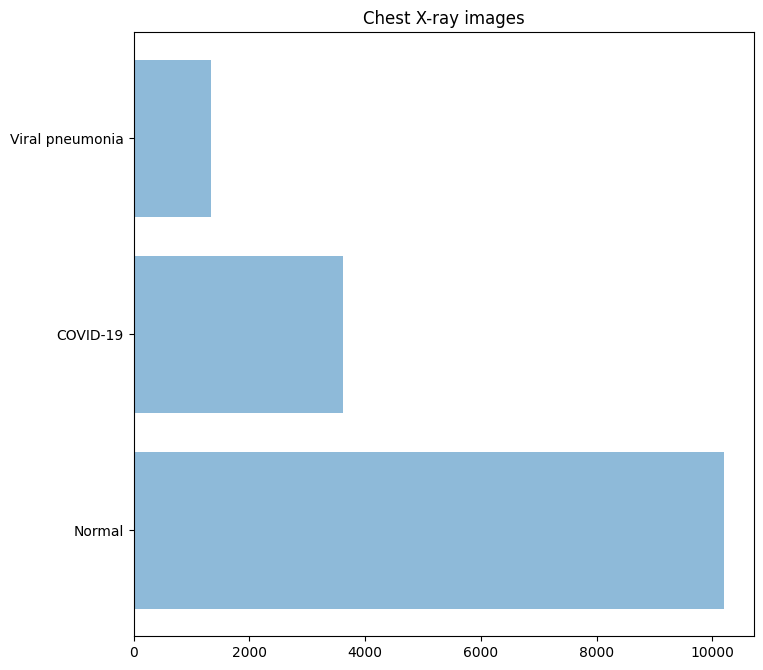

In [ ]:
objects = ('Normal', 'COVID-19', 'Viral pneumonia')
y_pos = np.arange(len(objects))
performance = [len_normal, len_covid, len_viral_pneumonia]

plt.barh(y_pos,performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.title('Chest X-ray images')

plt.show()

#Train test split

In [ ]:

def resize_image(imgpath):
    img = np.array(ImageOps.grayscale(Image.open(imgpath)).resize((150, 150), Image.ANTIALIAS))
    return img

In [ ]:
import os
x_ = list()
y = list()

for i in random.sample(os.listdir(path_normal), 5000):
    try:
        imgpath = path_normal+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(0)
    except:
        None
        
for i in os.listdir(path_covid):
    try:
        imgpath = path_covid+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir(path_viral_pneumonia):
    try:
        imgpath = path_viral_pneumonia+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(2)
    except:
        None
x_ = np.array(x_)
y=np.array(y)

In [ ]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([5000, 3616, 1345]))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
y = lb_encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y)
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.2,random_state = 20)

x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.15,random_state = 40)

In [ ]:
classNames = ["normal","COVID_19","viral_pneumonia"]
print(classNames)

['normal', 'COVID_19', 'viral_pneumonia']


In [ ]:
unique, counts = np.unique(y_train.argmax(axis=1), return_counts=True)
uniqueVal, countsVal = np.unique(y_val.argmax(axis=1), return_counts=True)
dict(zip(unique, counts))

{0: 3995, 1: 2901, 2: 1072}

In [ ]:
dict(zip(uniqueVal, countsVal))

{0: 866, 1: 596, 2: 232}

#Training model-VGG





In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Flatten
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
def createModel():
    _input = Input(shape=(150,150,1))

    conv1  = Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu")(_input)
    conv2  = Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu")(conv1)
    pool1  = MaxPooling2D((2, 2))(conv2)
    

    conv3  = SeparableConv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")(pool1)
    conv4  = SeparableConv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")(conv3)
    conv4  = BatchNormalization()(conv4)
    pool2  = MaxPooling2D((2, 2))(conv4)

    conv5  = SeparableConv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(pool2)
    conv6  = SeparableConv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv5)
    conv6  = BatchNormalization()(conv6)
    pool3  = MaxPooling2D((2, 2))(conv6)

    conv7  = SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool3)
    conv8  = SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv7)
    conv8 = BatchNormalization()(conv8)
    pool4  = MaxPooling2D((2, 2))(conv8)
    pool4 = Dropout(rate=0.2)(pool4)
    
    conv9 = SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool4)
    conv10 = SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv9)
    conv10 = BatchNormalization()(conv10)
    pool5  = MaxPooling2D((2, 2))(conv10)
    pool5 = Dropout(rate=0.2)(pool5)

    flat   = Flatten()(pool5)
    dense1 = Dense(512, activation="relu")(flat)   
    dropout1 = Dropout(rate=0.7)(dense1)
    dense2 = Dense(128, activation="relu")(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    output = Dense(3, activation="sigmoid")(dropout2)
    model  = Model(inputs=_input, outputs=output)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
modelFitLRate = createModel()
epochs = 10


In [ ]:
with tf.device('/gpu:0'):
    print("Training the model with gpu . . .")
    history = modelFitLRate.fit(x_train, y_train, validation_data=(x_val, y_val),
                            batch_size=22, epochs=epochs)


Training the model with gpu . . .
Epoch 1/10
363/363 [==============================] - 37s 99ms/step - loss: 0.3130 - accuracy: 0.7997 - val_loss: 0.8620 - val_accuracy: 0.3518
Epoch 2/10
363/363 [==============================] - 34s 93ms/step - loss: 0.1819 - accuracy: 0.8998 - val_loss: 0.1828 - val_accuracy: 0.8867
Epoch 3/10
363/363 [==============================] - 31s 84ms/step - loss: 0.1484 - accuracy: 0.9168 - val_loss: 0.2540 - val_accuracy: 0.8530
Epoch 4/10
363/363 [==============================] - 30s 82ms/step - loss: 0.1319 - accuracy: 0.9280 - val_loss: 0.1824 - val_accuracy: 0.8979
Epoch 5/10
363/363 [==============================] - 32s 89ms/step - loss: 0.1151 - accuracy: 0.9398 - val_loss: 0.2570 - val_accuracy: 0.8719
Epoch 6/10
363/363 [==============================] - 33s 91ms/step - loss: 0.1028 - accuracy: 0.9448 - val_loss: 0.1214 - val_accuracy: 0.9292
Epoch 7/10
363/363 [==============================] - 31s 85ms/step - loss: 0.0914 - accuracy: 0.9493 

In [ ]:
modelFitLRate.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 16)      160       
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_40 (Separa  (None, 75, 75, 32)       688       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_41 (Separa  (None, 75, 75, 32)       1344

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Aug  5 13:34:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    30W /  70W |   2892MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Plot the result

In [ ]:
modelFitLRate.save('/content/drive/MyDrive/AI Seminar/Covid_Grayscale.h5')

In [ ]:
mypredict = modelFitLRate.predict(x_test)
pred = np.argmax(mypredict, axis=-1)
print(pred)

[1 2 2 0 0 0 1 2 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 2 1 0 1 1 0
 2 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 2 0 1 1 1 2
 1 1 0 1 0 2 1 1 0 1 2 1 1 1 0 0 1 0 0 1 1 0 2 2 2 1 1 0 1 2 0 2 1 1 0 1 0
 0 1 1 2 0 0 0 2 0 0 0 1 0 0 1 2 0 1 0 1 1 2 0 1 1 1 0 0 0 0 1 2 0 0 0 0 0
 1 0 1 1 1 1 0 2 0 2 2 0 0 1 1 1 1 2 1 0 0 0 2 0 1 0 1 0 0 1 1 0 2 0 0 1 2
 1 1 0 1 0 1 0 0 2 1 0 0 0 2 1 1 2 0 0 0 2 1 1 1 0 0 2 1 0 1 1 0 1 1 1 0 2
 0 0 0 0 0 1 0 1 1 1 1 0 1 2 0 1 1 1 1 1 2 1 0 0 2 0 2 2 1 1 1 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 0 0 0 0 0 2 0 0 1 2 0 1 0 2 1 1 0 1 0 2 1 1 0 0 0 0 1 0
 0 0 0]


[INFO] evaluating network...


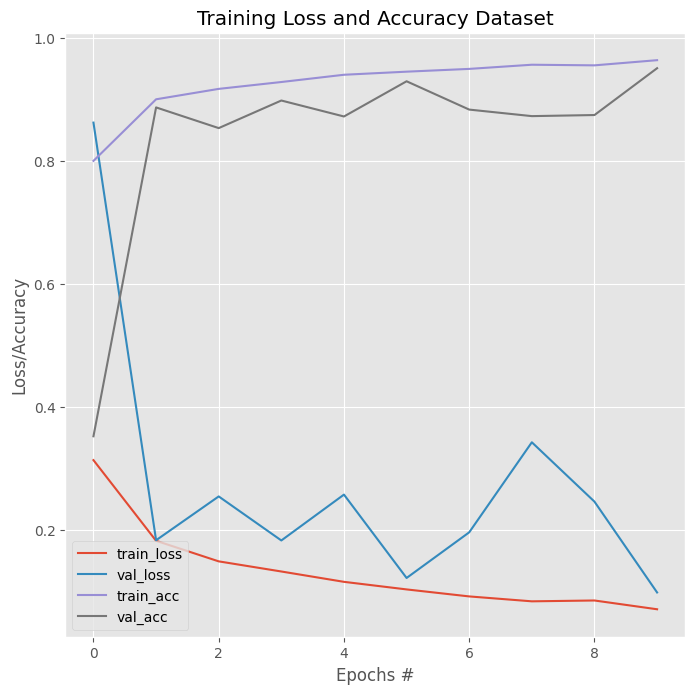

In [ ]:
def showChartEpochAccuracy(history):
    # show a nicely formatted classification report
    print("[INFO] evaluating network...")
    # plot the training loss and accuracy
    N = epochs
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy Dataset")
    plt.xlabel("Epochs #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()

showChartEpochAccuracy(history)

In [ ]:
evalute =modelFitLRate.evaluate(x_test, y_test)

10/10 [==============================] - 1s 90ms/step - loss: 0.0771 - accuracy: 0.9699


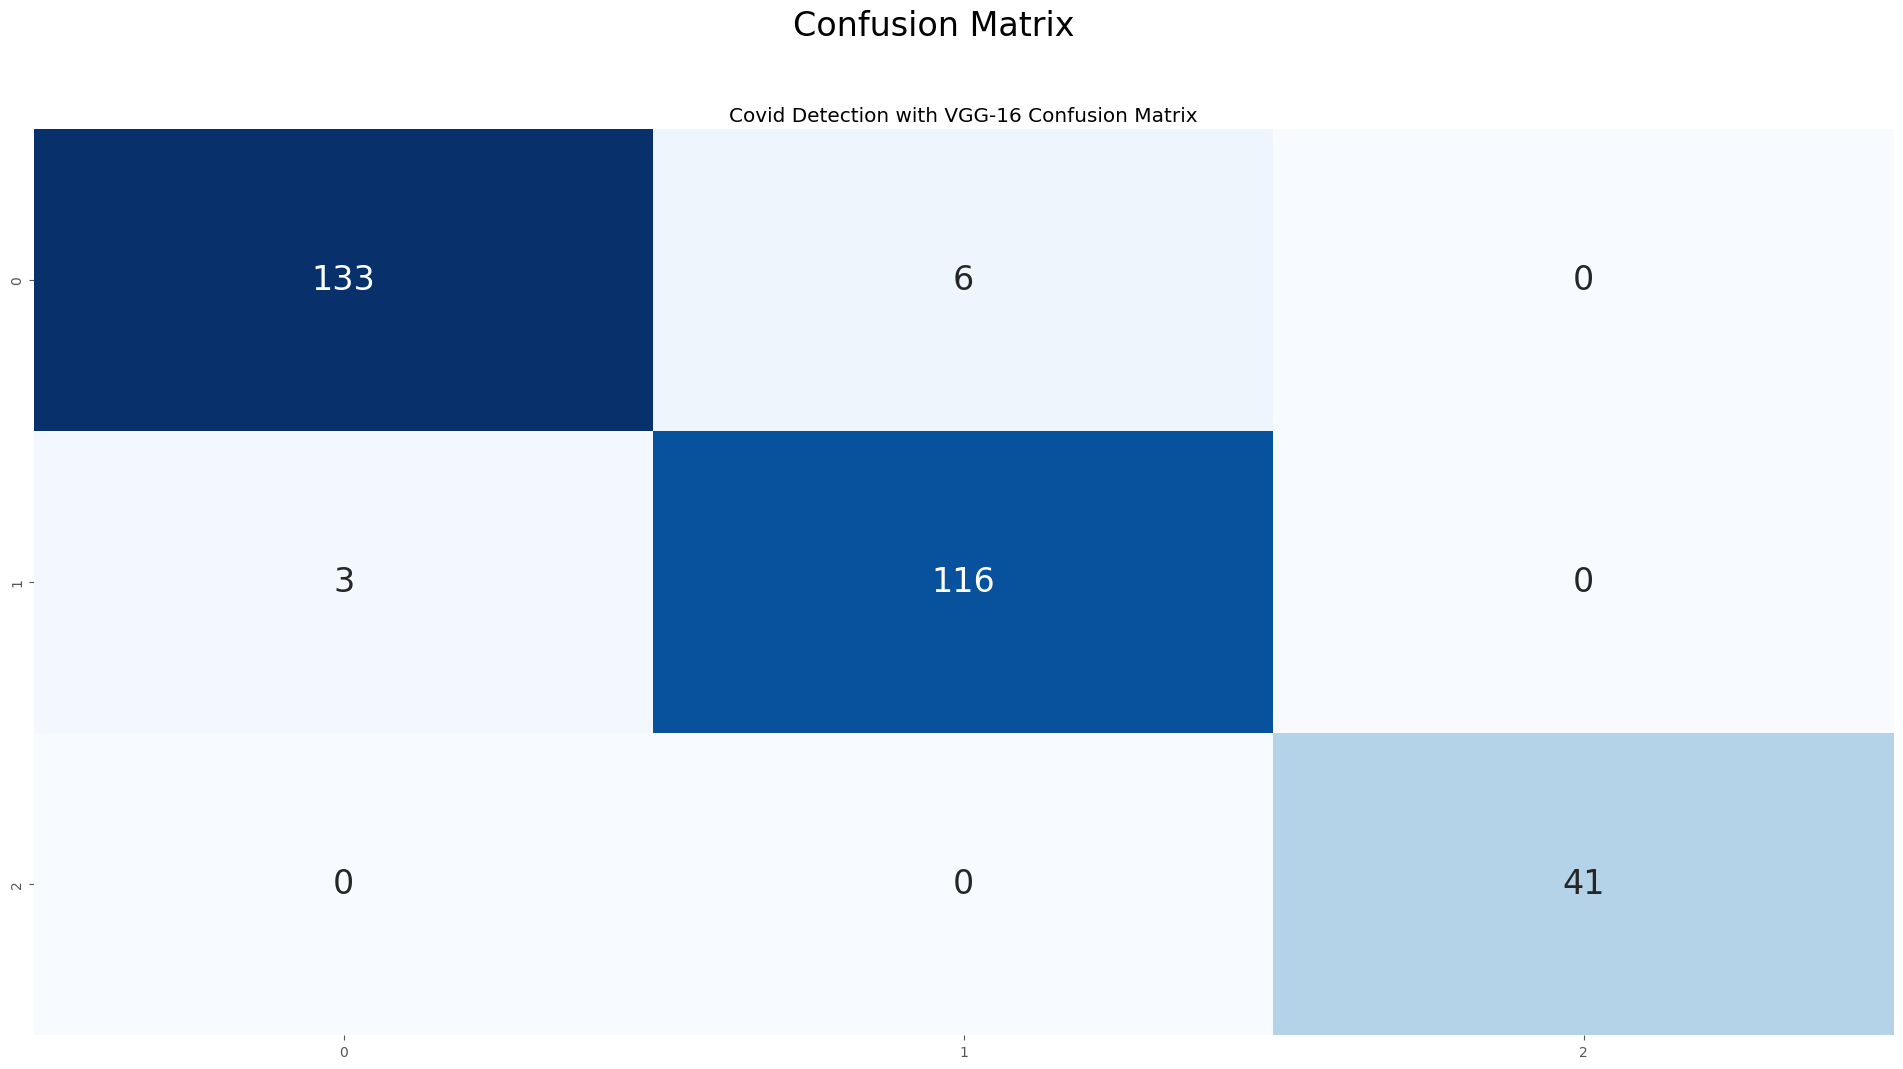

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


cm = confusion_matrix(y_test.argmax(axis=1), mypredict.argmax(axis=1))

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrix",fontsize=24)
plt.title("Covid Detection with VGG-16 Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

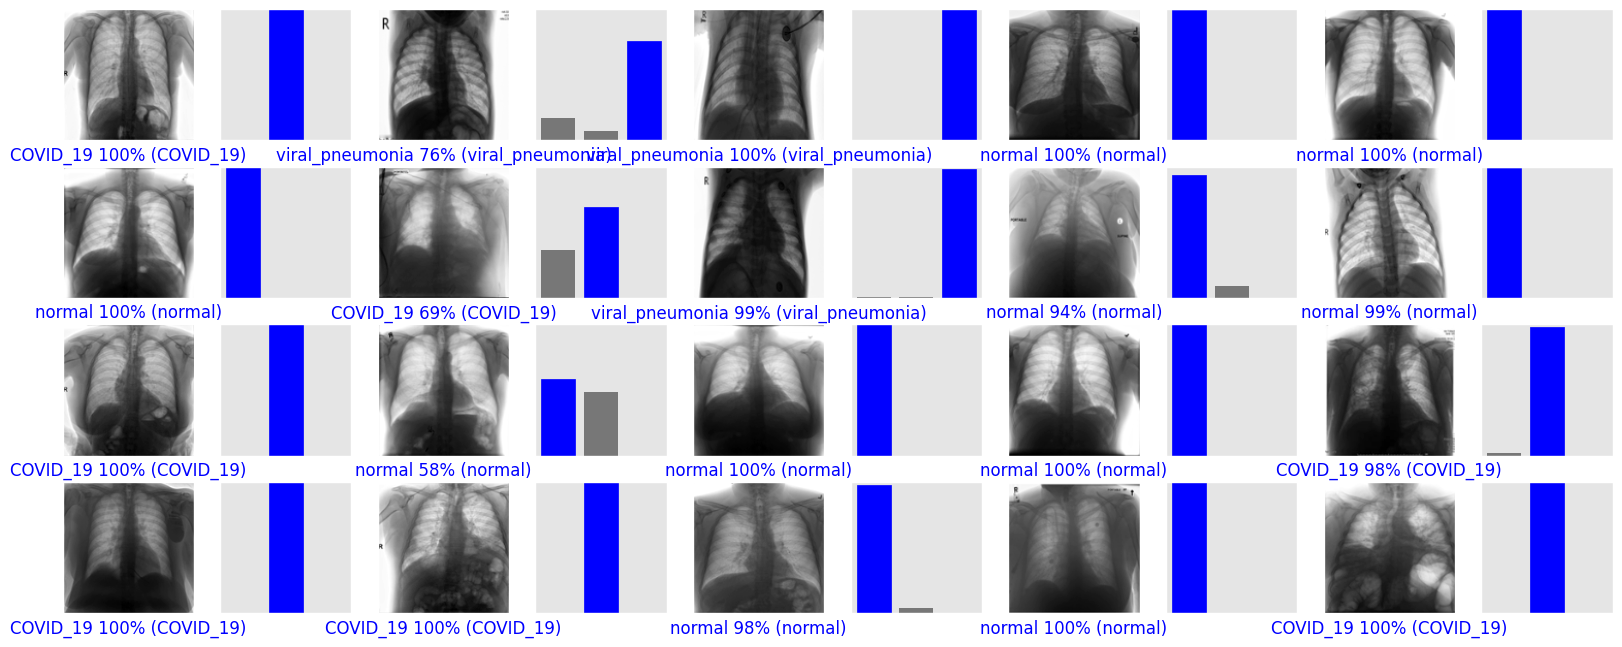

In [ ]:
import matplotlib.pyplot as plt

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = cv2.resize(img,(128,128))
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    true_label= np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)
    
def showResultPrediction(predictions):
    num_rows = 4
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions, y_test, x_test)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions, y_test)
    plt.show()

showResultPrediction(mypredict)


In [ ]:
np.save('/content/drive/MyDrive/AI Seminar/test/x_test.npy',x_test)
np.save('/content/drive/MyDrive/AI Seminar/test/y_test.npy',y_test)


In [ ]:
np.save('/content/drive/MyDrive/AI Seminar/test/x_train.npy',x_train)
np.save('/content/drive/MyDrive/AI Seminar/test/y_train.npy',y_train)

In [ ]:
np.save('/content/drive/MyDrive/AI Seminar/test/x_val.npy',x_val)
np.save('/content/drive/MyDrive/AI Seminar/test/y_val.npy',y_val)

In [ ]:
modelFitLRate.save('/content/drive/MyDrive/AI Seminar/test/Covid_class.h5')